# Titanic Classification

In [31]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
import numpy as np


In [123]:
or_data = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic-Dataset.csv')

In [124]:
or_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
or_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
or_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
or_data.isnull().sum()/or_data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
sns.heatmap(or_data.corr(), cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Axes: xlabel='Survived', ylabel='count'>

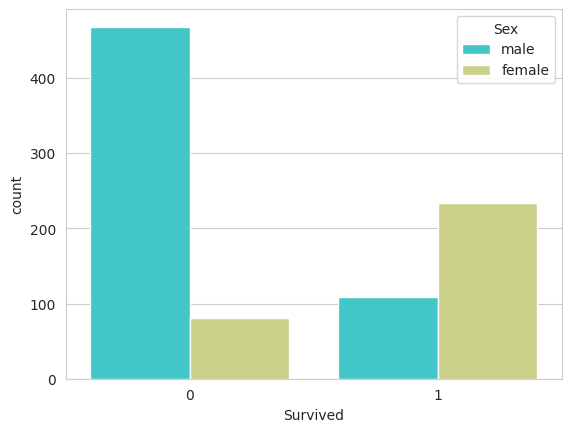

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Sex',data=or_data,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

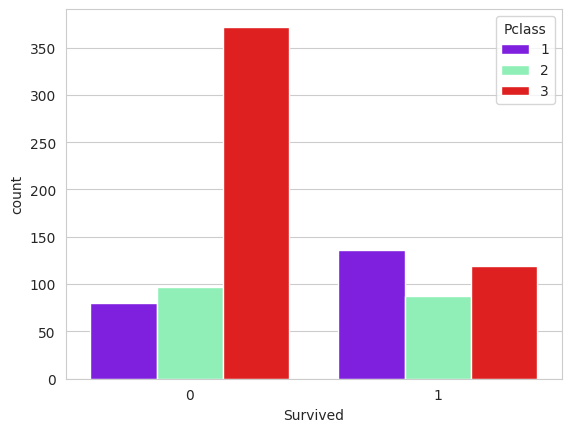

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Pclass',data=or_data,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

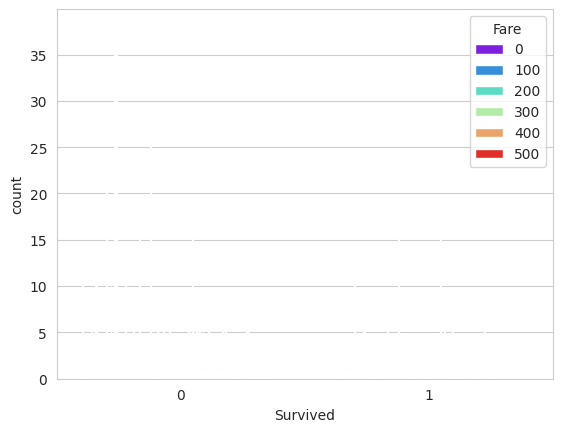

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue = 'Fare',data=or_data,palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

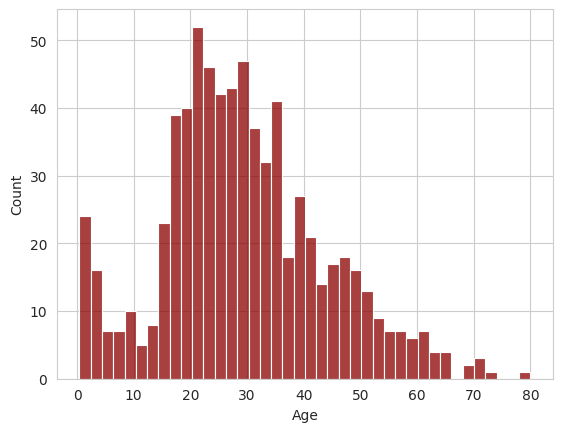

In [41]:
sns.histplot(or_data['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='Age'>

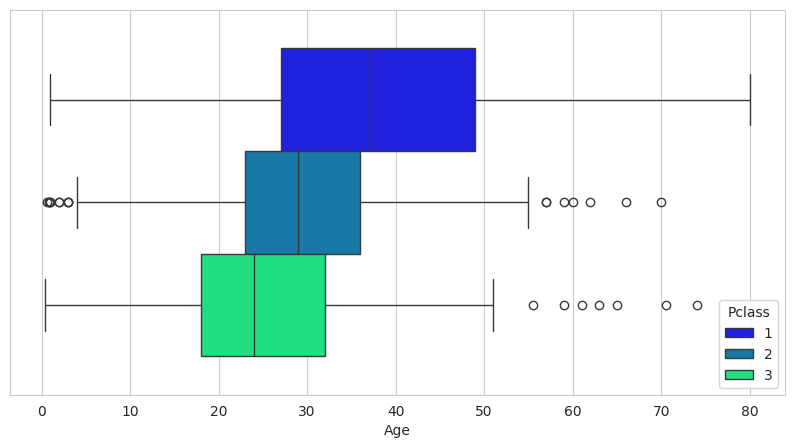

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Age',hue='Pclass', data= or_data,palette='winter')

In [125]:
def input_ages(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 38
    elif Pclass ==2:
      return 29
    else:
      return 24
  else:
    return Age

In [126]:
or_data['Age'] = or_data[['Age','Pclass']].apply(input_ages, axis=1)

In [127]:
or_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

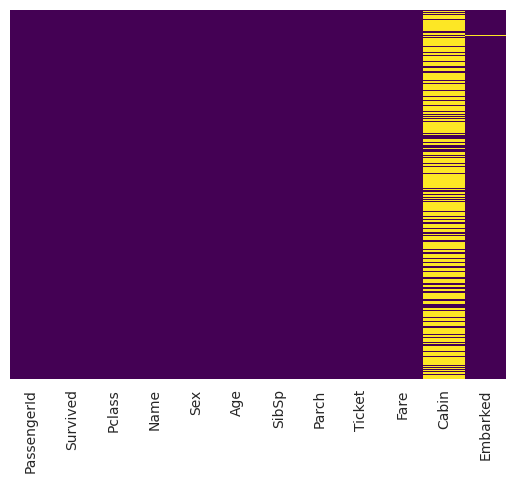

In [62]:
sns.heatmap(or_data.isnull(),yticklabels=False, cbar = False, cmap='viridis')

In [128]:
or_data.drop('Cabin', axis=1, inplace=True)

In [64]:
or_data.head(),or_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Embarked  
 0      0         A/5 21171   7.2500        S  
 1      0          PC 17599  71.2833        C  
 2      0  STON/O2. 3101282   7.9250        S  
 3      0            113803  53.1000        S  
 4      0            373450   8.0500        S  ,
 None)

<Axes: >

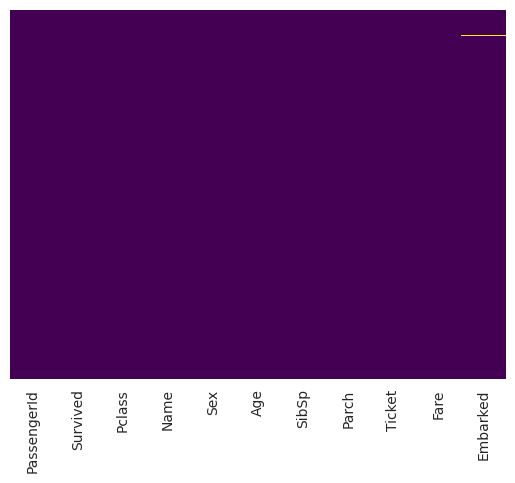

In [65]:
sns.heatmap(or_data.isnull(),yticklabels=False, cbar = False, cmap='viridis')

In [129]:
or_data['Embarked'].fillna(or_data['Embarked'].mode()[0],inplace=True)

<Axes: >

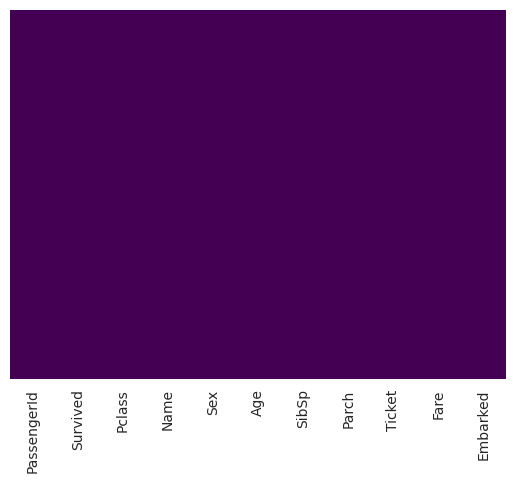

In [130]:
sns.heatmap(or_data.isnull(),yticklabels=False, cbar = False, cmap='viridis')

In [49]:
# or_data.dropna(subset=['Embarked'], inplace=True)

## Coverting values in Categories

In [132]:
pd.get_dummies(or_data['Embarked'],dtype=np.int64).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [133]:
pd.get_dummies(or_data['Sex'],dtype=np.int64).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [121]:
# or_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [134]:
Embark = pd.get_dummies(or_data['Embarked'],dtype=np.int64)
Sex = pd.get_dummies(or_data['Sex'],dtype=np.int64)

In [135]:
or_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [136]:
# or_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [137]:
or_data=pd.concat([or_data,Sex,Embark],axis=1)

In [138]:
or_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Building Logistic Regression Model

In [139]:
train = or_data.drop(columns= ['Survived'],axis=1)

In [115]:
# or_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Standard Scale


In [97]:
# from sklearn.preprocessing import StandardScaler

In [98]:
# scale = StandardScaler()

In [99]:
# train['Age']= scale.fit_transform(train[['Age']])

In [100]:
# train['Fare'] = scale.fit_transform(train[['Fare']])

In [142]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [141]:
train.drop('PassengerId', axis=1, inplace=True)

In [143]:
y=or_data['Survived']

In [144]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=.2)

## Training and Testing

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
titanic_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [149]:
titanic_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [150]:
prediction = titanic_model.predict(x_test)

In [151]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [152]:
accuracy = confusion_matrix(y_test,prediction)

In [153]:
accuracy

array([[97,  6],
       [28, 48]])

In [154]:
score=accuracy_score(y_test,prediction)
score

0.8100558659217877

In [155]:
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1])

In [156]:
import pickle

In [157]:
pickle.dump(titanic_model,open('titanic_model.pkl','wb'))